### ReLU函数

In [1]:
%matplotlib inline
from mxnet import autograd, nd
import d2lzh as d2l

def xyplot(x_vals, y_vals, name):
    d2l.set_figsize(figsize=(5, 2.5))
    d2l.plt.plot(x_vals.asnumpy(), y_vals.asnumpy())
    d2l.plt.xlabel('x')
    d2l.plt.ylabel(name + '(x)')

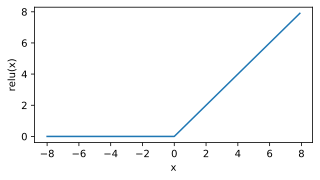

In [2]:
x = nd.arange(-8.0, 8.0, 0.1)
x.attach_grad()
with autograd.record():
    y = x.relu()
xyplot(x, y, 'relu')

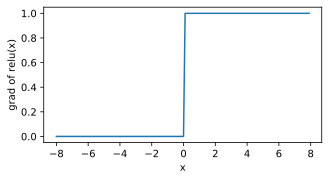

In [3]:
y.backward()
xyplot(x, x.grad, 'grad of relu')

### sigmoid函数
$$sigmoid(x) = \frac{1}{1 + exp(-x)}$$

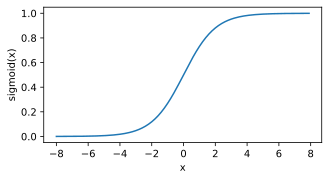

In [4]:
with autograd.record():
    y = x.sigmoid()
xyplot(x, y, 'sigmoid')

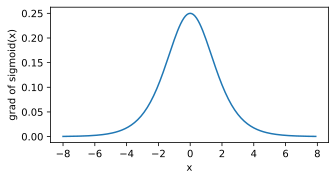

In [5]:
y.backward()
xyplot(x, x.grad, 'grad of sigmoid')

### tanh函数
tanh（双曲正切）函数可以将元素值变换到-1和1之间:
$$tanh(x) = \frac{1 - exp(-2x)}{1 + exp(-2x)}$$

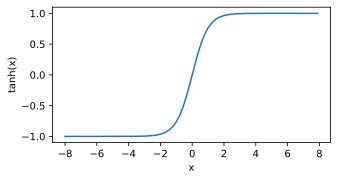

In [6]:
with autograd.record():
    y = x.tanh()
xyplot(x, y, 'tanh')

$$tanh^{’}(x) = 1 - tanh^{2}(x)$$

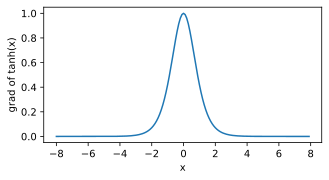

In [7]:
y.backward()
xyplot(x, x.grad, 'grad of tanh')

In [8]:
from mxnet.gluon import loss as gloss

In [9]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [10]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256

w1 = nd.random.normal(scale=0.01, shape=(num_inputs, num_hiddens))
b1 = nd.zeros(shape=(num_hiddens))
w2 = nd.random.normal(scale=0.01, shape=(num_hiddens, num_outputs))
b2 = nd.zeros(shape=(num_outputs))
params = [w1, b1, w2, b2]

for param in params:
    param.attach_grad()

In [11]:
def relu(X):
    return nd.maximum(X, 0)

In [12]:
def net(X):
    X = X.reshape(-1, num_inputs)
    H = relu(nd.dot(X, w1) + b1)
    return nd.dot(H, w2) + b2

In [13]:
loss = gloss.SoftmaxCrossEntropyLoss()

In [14]:
num_epochs, lr = 5, 0.5
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, params, lr)

epoch 1, loss 0.8076, train acc 0.698, test acc 0.818
epoch 2, loss 0.4940, train acc 0.818, test acc 0.851
epoch 3, loss 0.4325, train acc 0.840, test acc 0.854
epoch 4, loss 0.3984, train acc 0.853, test acc 0.860
epoch 5, loss 0.3733, train acc 0.862, test acc 0.871


### 多层感知机简洁实现

In [15]:
from mxnet import gluon, init
from mxnet.gluon import loss as gloss, nn

In [16]:
net = nn.Sequential()
net.add(nn.Dense(256, activation='relu'),
        nn.Dense(10))

In [17]:
net.initialize(init.Normal(sigma=0.01))

In [18]:
loss = gloss.SoftmaxCrossEntropyLoss()

In [19]:
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.5})

In [20]:
num_epochs = 5
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, None, None, trainer)

epoch 1, loss 0.7995, train acc 0.705, test acc 0.795
epoch 2, loss 0.4808, train acc 0.821, test acc 0.841
epoch 3, loss 0.4279, train acc 0.843, test acc 0.865
epoch 4, loss 0.3912, train acc 0.856, test acc 0.867
epoch 5, loss 0.3708, train acc 0.862, test acc 0.874


In [21]:
help(d2l.train_ch3)

Help on function train_ch3 in module d2lzh.utils:

train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, params=None, lr=None, trainer=None)
    Train and evaluate a model with CPU.



### 多项式拟合实验

In [22]:
from mxnet import autograd, nd
from mxnet.gluon import data as gdata, loss as gloss, nn

In [23]:
n_train, n_test, true_w, true_b = 100, 100, [1.2, -3.4, 5.6], 5
features = nd.random.normal(shape=(n_train + n_test, 1))
ploy_features = nd.concat(features, nd.power(features, 2), nd.power(features, 3))

labels = (true_w[0] * ploy_features[:, 0] + true_w[1] * ploy_features[:, 1]
          + true_w[2] * ploy_features[:, 2] + true_b)
labels += nd.random.normal(scale=0.1, shape=labels.shape)

In [24]:
features[:2], ploy_features[:2], labels[:2]

(
 [[0.66495943]
  [0.14528377]]
 <NDArray 2x1 @cpu(0)>,
 
 [[0.66495943 0.44217104 0.2940258 ]
  [0.14528377 0.02110738 0.00306656]]
 <NDArray 2x3 @cpu(0)>,
 
 [5.874478  5.1221323]
 <NDArray 2 @cpu(0)>)

In [25]:
def semilogy(x_vals, y_vals, x_label, y_label, x2_vals=None, y2_vals=None,
             legend=None, figsize=(3.5, 2.5)):
    d2l.set_figsize(figsize)
    d2l.plt.xlabel(x_label)
    d2l.plt.ylabel(y_label)
    d2l.plt.semilogy(x_vals, y_vals)  # 对数尺度缩放
    if x2_vals and y2_vals:
        d2l.plt.semilogy(x2_vals, y2_vals, linestyle=':')
        d2l.plt.legend(legend)

In [26]:
help(d2l.plt.semilogy)

Help on function semilogy in module matplotlib.pyplot:

semilogy(*args, **kwargs)
    Make a plot with log scaling on the y axis.
    
    Call signatures::
    
        semilogy([x], y, [fmt], data=None, **kwargs)
        semilogy([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    This is just a thin wrapper around `.plot` which additionally changes
    the y-axis to log scaling. All of the concepts and parameters of plot
    can be used here as well.
    
    The additional parameters *basey*, *subsy* and *nonposy* control the
    y-axis properties. They are just forwarded to `.Axes.set_yscale`.
    
    Parameters
    ----------
    basey : scalar, optional, default 10
        Base of the y logarithm.
    
    subsy : array_like, optional
        The location of the minor yticks. If *None*, reasonable locations
        are automatically chosen depending on the number of decades in the
        plot. See `.Axes.set_yscale` for details.
    
    nonposy : {'mask', 'clip'}, option

In [27]:
num_epochs, loss = 100, gloss.L2Loss()

def fit_and_plot(train_features, test_features, train_labels, test_labels):
    net = nn.Sequential()
    net.add(nn.Dense(1))
    net.initialize()
    batch_size = min(10, train_labels.shape[0])
    train_iter = gdata.DataLoader(gdata.ArrayDataset(train_features, train_labels),
                                  batch_size, shuffle=True)
    trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate':0.01})
    train_ls, test_ls = [], []
    for _ in range(num_epochs):
        for X, y in train_iter:
            with autograd.record():
                l = loss(net(X), y)
            l.backward()
            trainer.step(batch_size)
        train_ls.append(loss(net(train_features), train_labels).mean().asscalar())
        test_ls.append(loss(net(test_features), test_labels).mean().asscalar())
    print('final epoch: train_loss', train_ls[-1], 'test loss', test_ls[-1])
    semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss',
             range(1, num_epochs + 1), test_ls, ['train', 'test'])
    print('weight: ', net[0].weight.data().asnumpy(),
         '\nbias: ', net[0].bias.data().asnumpy())

final epoch: train_loss 0.0056753177 test loss 0.005886589
weight:  [[ 1.2434769 -3.3863053  5.590746 ]] 
bias:  [4.9701424]


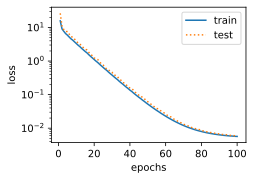

In [28]:
fit_and_plot(ploy_features[:n_train, :], ploy_features[n_train:,:],
            labels[:n_train], labels[n_train:])

final epoch: train_loss 76.5452 test loss 122.62209
weight:  [[17.739433]] 
bias:  [1.4934388]


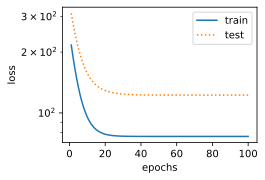

In [29]:
fit_and_plot(features[:n_train, :], features[n_train:,:],
            labels[:n_train], labels[n_train:])

final epoch: train_loss 1.2722652 test loss 305.345
weight:  [[1.2537671  0.743752   0.43682265]] 
bias:  [3.1671042]


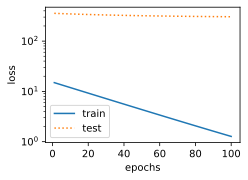

In [35]:
fit_and_plot(ploy_features[0:2, :], ploy_features[n_train:,:],
            labels[:2], labels[n_train:])